In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import read

In [3]:
def dft(Signal):
    N = len(Signal)
    X = []
    iX = []
    for k in range(N):
        sum_r = 0
        sum_i = 0
        for n in range(N):
            ang = -2*np.pi*k*n/N
            sum_r += Signal[n]*np.cos(ang)
            sum_i += Signal[n]*np.sin(ang)
        X.append(sum_r)
        iX.append(sum_i)
    return (X,iX)

In [4]:
dft([1,0,0,0,0,0,0,0,0,0])

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

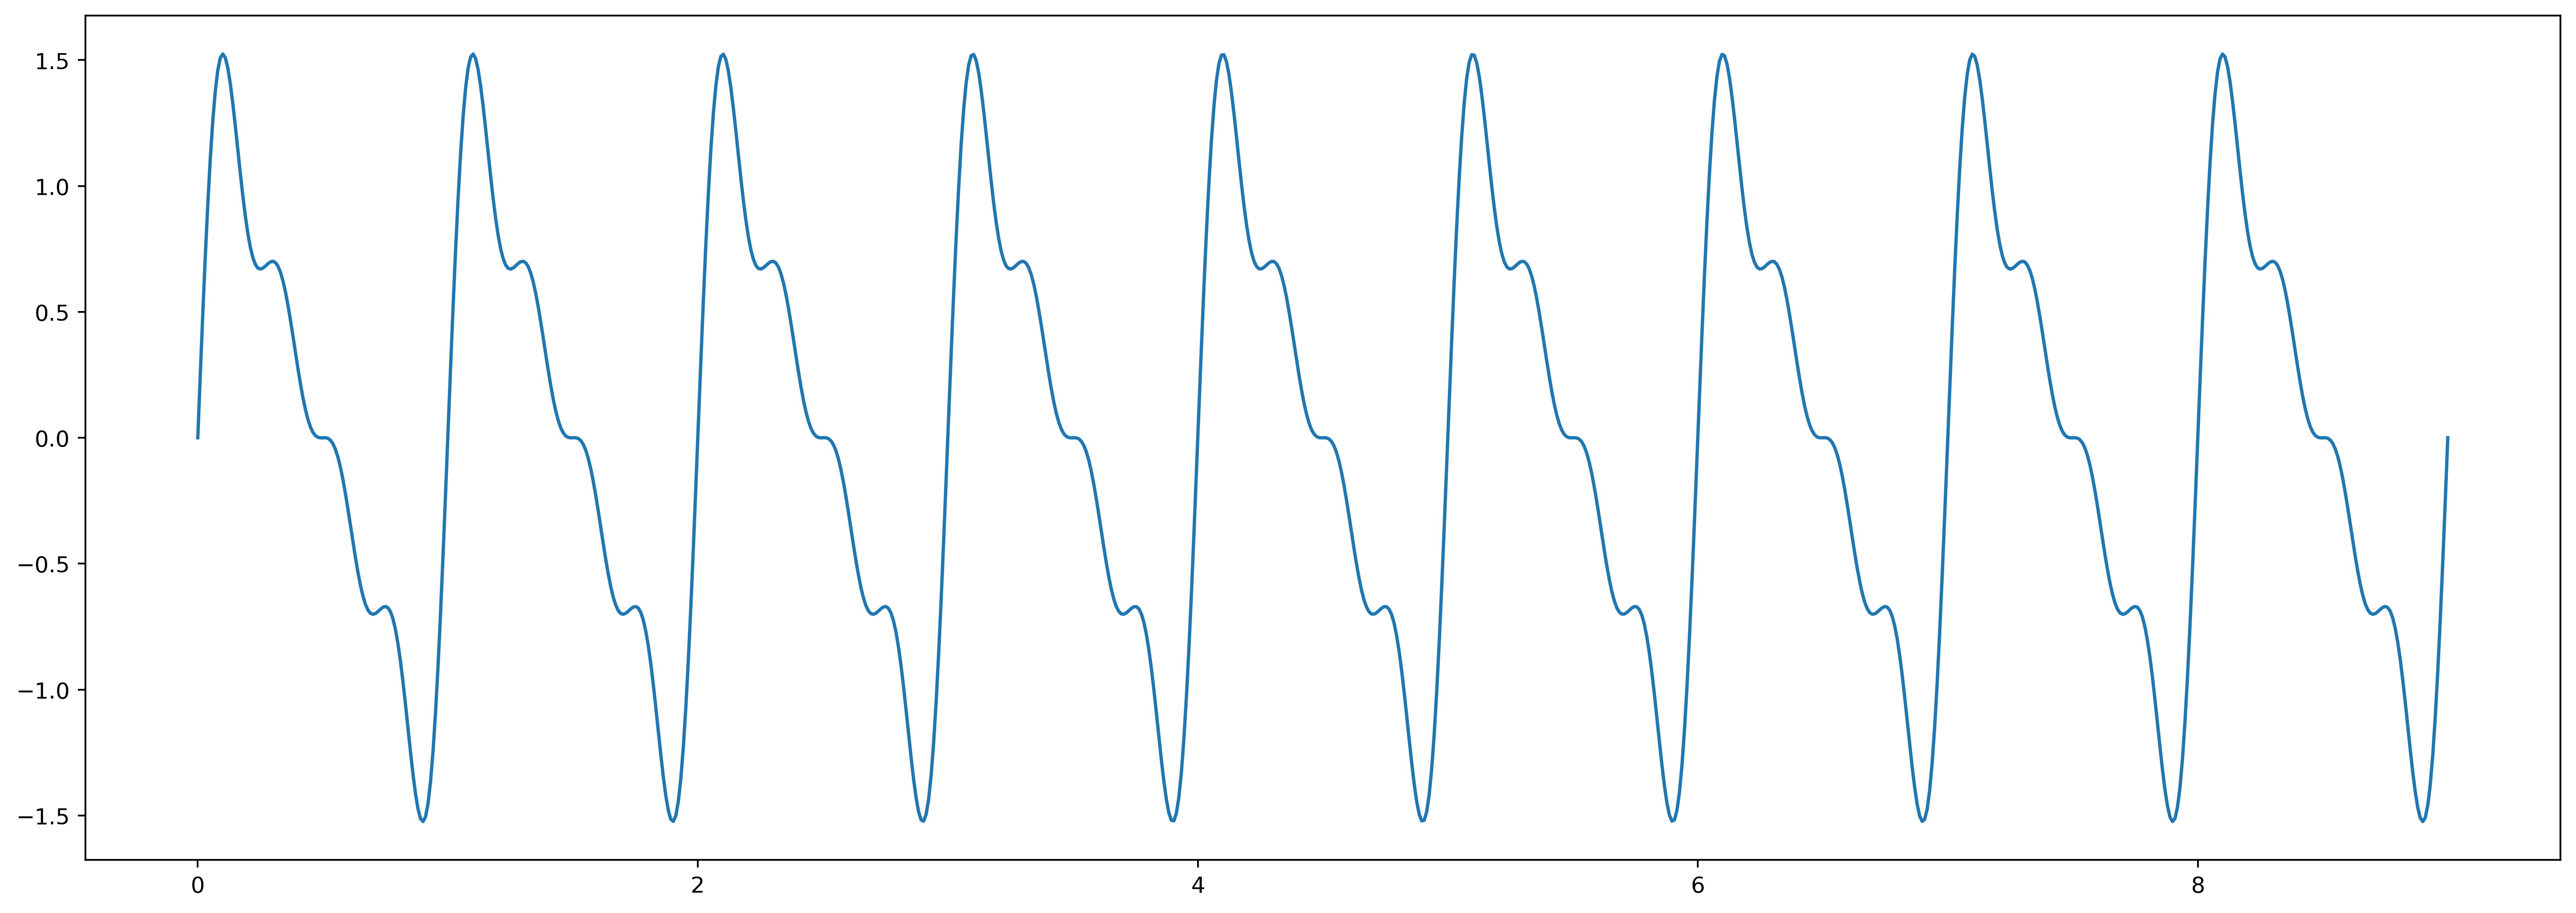

In [5]:
N = 900
T = 1/100
x = np.linspace(0,N*T,N)
signal = np.sin(2*np.pi*x)+.5*np.sin(4*np.pi*x)+.33*np.sin(6*np.pi*x)+.25*np.sin(8*np.pi*x)
plt.figure(figsize=(20,7),dpi=400)
plt.plot(x,signal)

In [6]:
aux = dft(signal)
X = np.sqrt(np.power(aux[0],2)+np.power(aux[1],2))

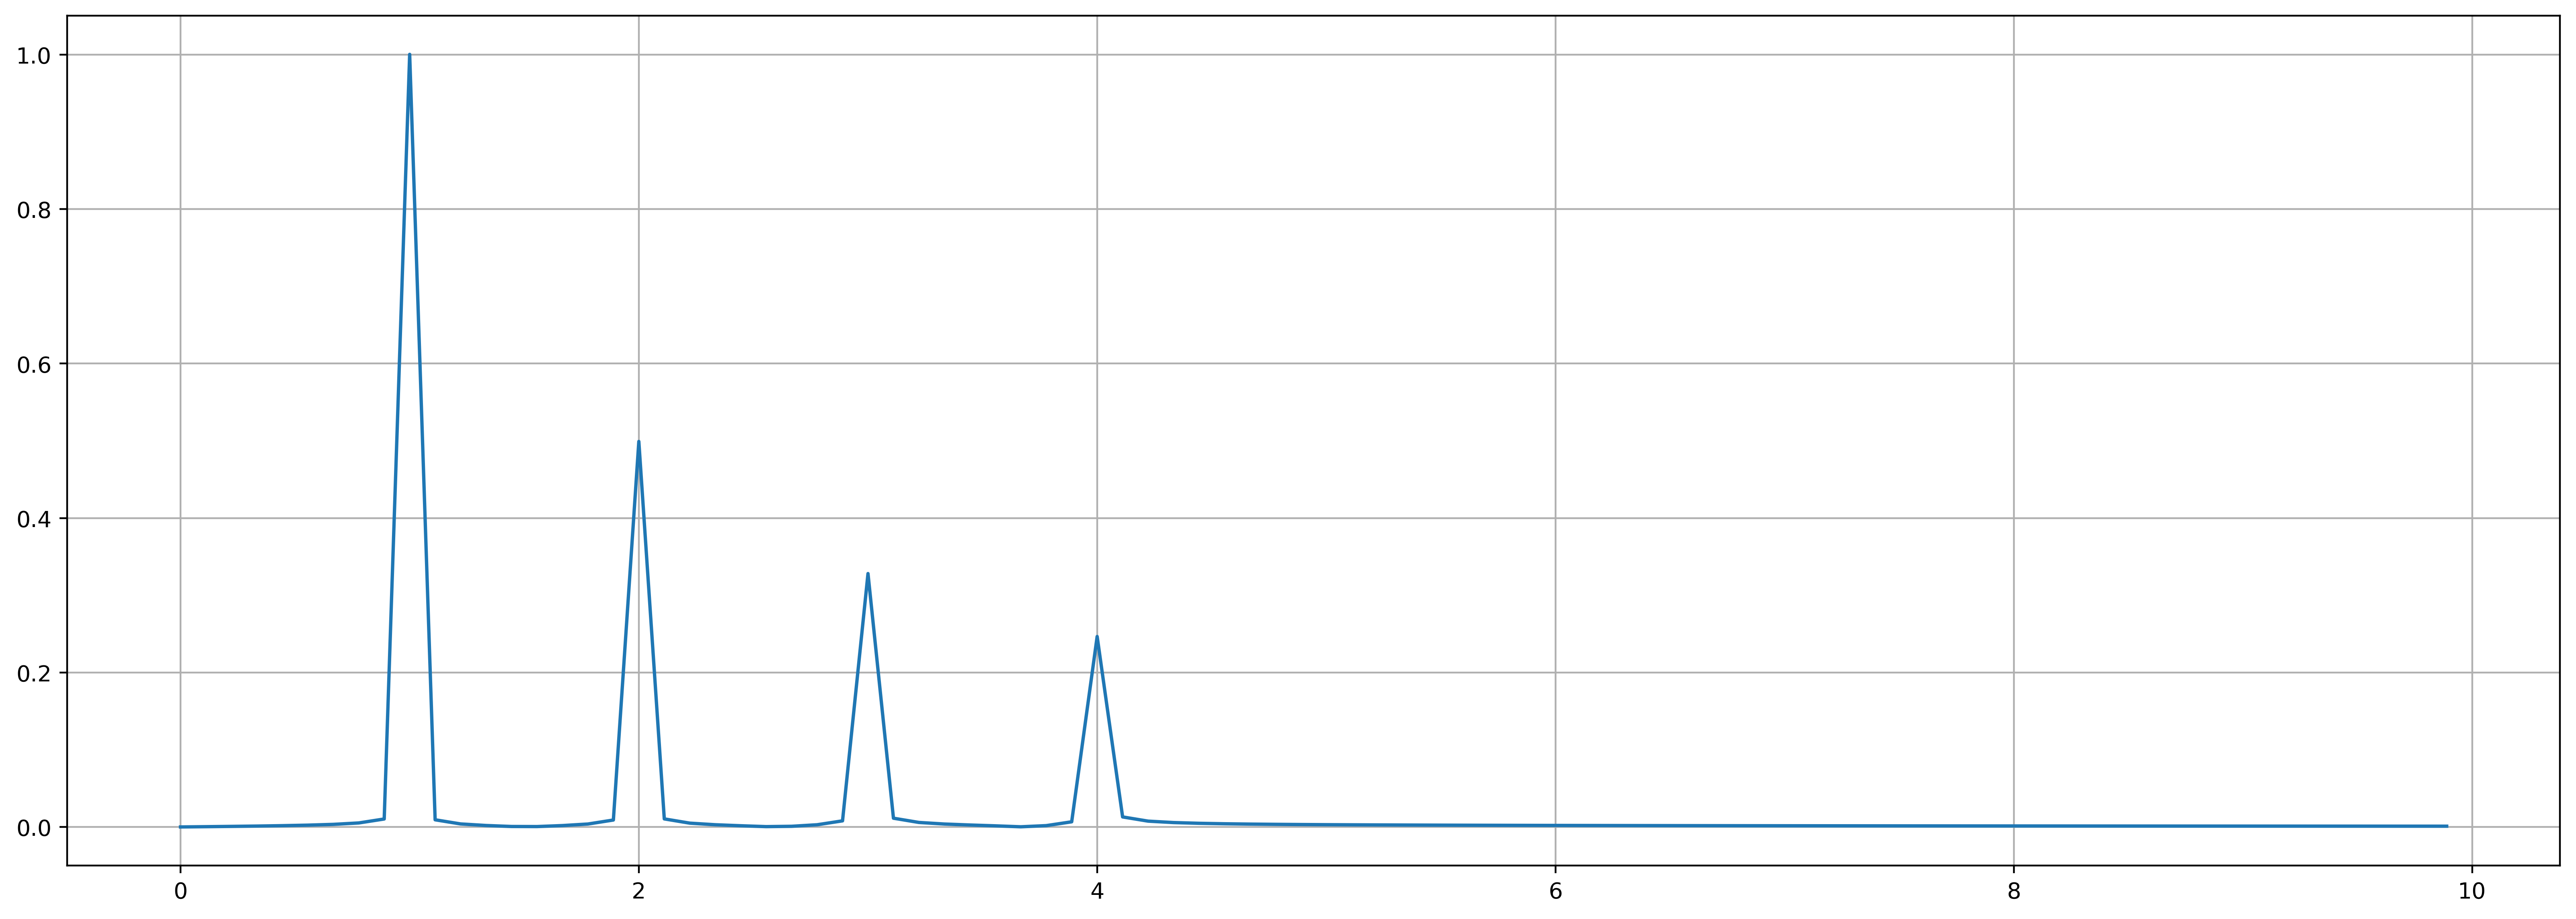

In [7]:
xf = fftfreq(N, T)[:N//10]
plt.figure(figsize=(20,7),dpi=400)
plt.plot(xf[:N//10],2/N*X[:N//10])
plt.grid()

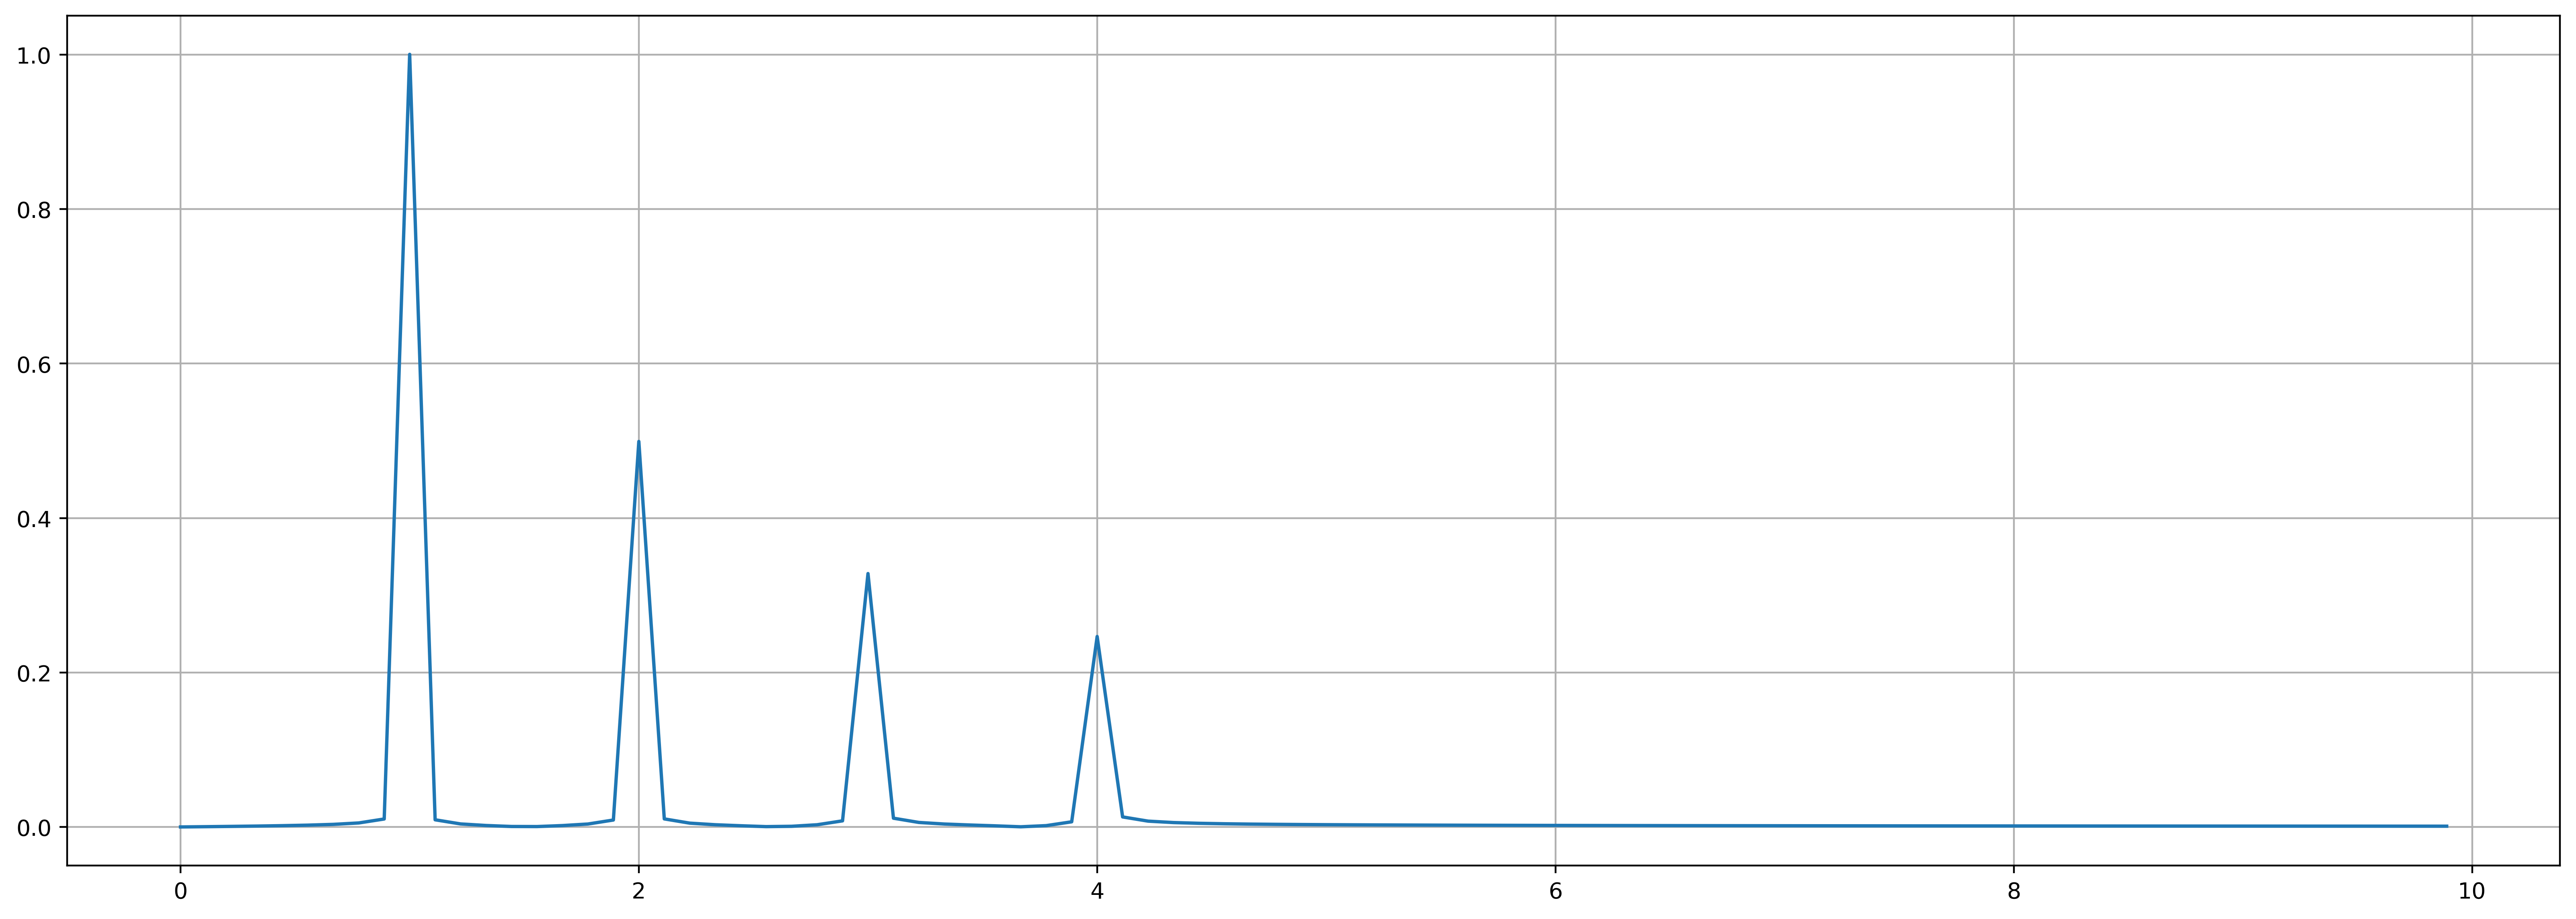

In [8]:
FT = np.absolute(fft(signal))
yf = fft(signal)
xf = fftfreq(N, T)[:N//10]
plt.figure(figsize=(20,7),dpi=400)
plt.plot(xf[:N//10], 2.0/N * np.abs(yf[0:N//10]))
plt.grid()

In [9]:
fft(np.array([0,1,0,0]))

array([ 1.-0.j,  0.-1.j, -1.-0.j,  0.+1.j])

In [10]:
inputFile_m = read('male.wav')

FileNotFoundError: [Errno 2] No such file or directory: 'male.wav'

In [ ]:
audio_m = inputFile_m[1]
plt.plot(audio_m)

In [ ]:
Nm = len(audio_m)
Tm = 1/inputFile_m[0]
Nm*Tm

In [ ]:
FTm = fft(audio_m)
xfm = fftfreq(Nm, Tm)[:Nm//2]
plt.plot(xfm, 2.0/Nm * np.abs(FTm[0:Nm//2]))
plt.grid()

In [ ]:
inputFile_f = read('female.wav')
audio_f = inputFile_f[1]
plt.plot(audio_f)

In [ ]:
Nf = len(audio_f)
Tf = 1/inputFile_f[0]
Nf*Tf

In [ ]:
FTf = fft(audio_f)
xff = fftfreq(Nf, Tf)[:Nf//2]
plt.figure(figsize=(20,9),dpi=400)
plt.plot(xff, 2.0/Nf * np.abs(FTf[0:Nf//2]))
plt.grid()

In [ ]:
def peak(L):
    count = 0
    pL = []
    for k in range(1,len(L)-1):
        if(L[k]>L[k-1] and L[k]>L[k+1]):
            count += 1
            pL.append(L[k])
    return pL

In [ ]:
print(len(peak(FTm)),len(audio_m))

In [ ]:
print(len(peak(FTf)),len(audio_f))

In [ ]:
plt.figure(figsize=(20,10),dpi=400)
plt.subplot(2,1,1)
plt.plot(xfm, 2.0/Nm * np.abs(FTm[0:Nm//2]),'blue')
plt.ylabel('male')
plt.grid()
plt.subplot(2,1,2)
plt.plot(xff, 2.0/Nf * np.abs(FTf[0:Nf//2]),'red')
plt.ylabel('female')
plt.xlabel('frequency')
plt.grid()

In [ ]:
input_juli = read('juli.wav')
audio_j = input_juli[1]
Nj = len(audio_j)
Tj = 1/input_juli[0]
print(Nj*Tj)
plt.figure(figsize=(20,6),dpi=400)
FTj = fft(audio_j)
xfj = fftfreq(Nj, Tj)[:Nj//2]
plt.plot(xfj, 2.0/Nj * np.abs(FTj[0:Nj//2]),'green')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()

In [ ]:
input_juli2 = read('juli2.wav')
audio_j2 = input_juli2[1]
Nj2 = len(audio_j2)
Tj2 = 1/input_juli2[0]
Nj2*Tj2

In [ ]:
plt.figure(figsize=(20,6),dpi=400)
FTj2 = fft(audio_j2)
xfj2 = fftfreq(Nj2, Tj2)[:Nj2//2]
plt.plot(xfj2, 2.0/Nj2 * np.abs(FTj2[0:Nj2//2]),'green')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()